In [29]:
import numpy as np

class planet:
    def __init__(self,
                 r=[[1.5], [0], [0]],
                 v=[[0], [0.6], [0]],
                 A=1,
                 # dt=0.01,
                 isTrack=False):
            self.v = np.array(v, dtype=np.float64)
            self.r = np.array(r - self.v*dt/2, dtype=np.float64)
            self.A = A
            # self.dt = dt
            self.isTrack = isTrack
            
            
    def step(self, dt):
        rdt = self.r[:,-1] + self.v[:,-1]*.01
        rdt = np.array([[r_] for r_ in rdt])
        self.r = np.append(self.r, rdt, axis=1)
        # self.r += self.v*dt
        self.v += - A * (self.r[:,-1]/(self.r[0,-1]**2 + self.r[1,-1]**2 + self.r[2,-1]**2)**(3/2)) *dt
        # print(r[:,-1])



<IPython.core.display.Javascript object>


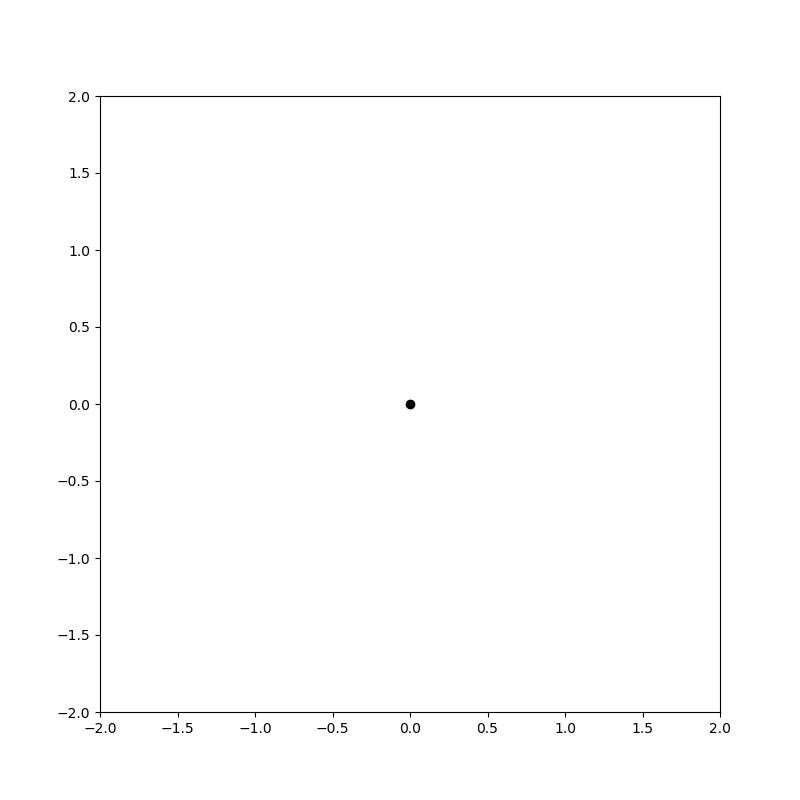

In [30]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib notebook

fig = plt.figure(figsize=(8, 8))
ax = plt.axes(xlim=(-2, 2), ylim=(-2, 2))


def init():
    planet_dot.set_data([], [])
    # rphi.set_data([], [])
    return planet_dot, # rphi


def redraw(i, planet_dot, earth, dt):
    earth.step(dt)
    
    planet_dot.set_data(earth.r[:2,-1])
    # if earth.isTrack:
    #     rphi.set_data(earth.r[:2])
    return planet_dot, # rphi


dt = 0.01
earth = planet(isTrack=True)

planet_dot, = ax.plot(earth.r[:2,-1], 'bo', c='green', lw=1)
# rphi, = ax.plot(earth.r[:2], lw=1) 
center, = ax.plot(0, 0, 'bo', c='black', lw=1)

anim = animation.FuncAnimation(fig,
                               redraw,
                               frames=600,
                               init_func=init,
                               interval=1,
                               blit=True,
                               fargs=(planet_dot, earth, dt),
                               )


In [28]:
asd = planet()

for i in range(10):
        
    rdt = asd.r[:,-1] + asd.v[:,-1]*.01
    rdt = np.array([[r_] for r_ in rdt])
    asd.r = np.append(asd.r, rdt, axis=1)

# print(asd.r.T)
asd.r

array([-4.43483512, -0.16852373, -0.        ])